# Explanation about The Data 

# Importing Library

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots


from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay

# Simple Explanatory Data Analysis (EDA) / Data Preprocessing

### 1.  Data Understanding

#### Import dataset 

In [46]:
data = pd.read_csv('diabetes.csv')
data.head() #View first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Identify the shape (row, column) of the datatset

In [47]:
data.shape

(768, 9)

#### Get the list of columns

In [48]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Identify data types for each column

In [49]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Get basic dataset information

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2. Handling Duplicates rows

#### Identify duplicate entries/rows

In [51]:
data.duplicated().value_counts()

False    768
dtype: int64

### 3. Handling Missing Value

#### Identify missing vlaue

In [52]:
print(data.isna().values.any())

False


### 4. Data Visualization

#### Boxplot 

In [53]:
fig = make_subplots(rows=1, cols=len(data.columns))

for i, var in enumerate(data.columns):
    fig.add_trace(
        go.Box(y=data[var],
        name=var),
        row=1, col=i+1
    )

fig.update_layout(height=700, width=1500, title_text="Box Plot")
fig.show()

#### Histogram 

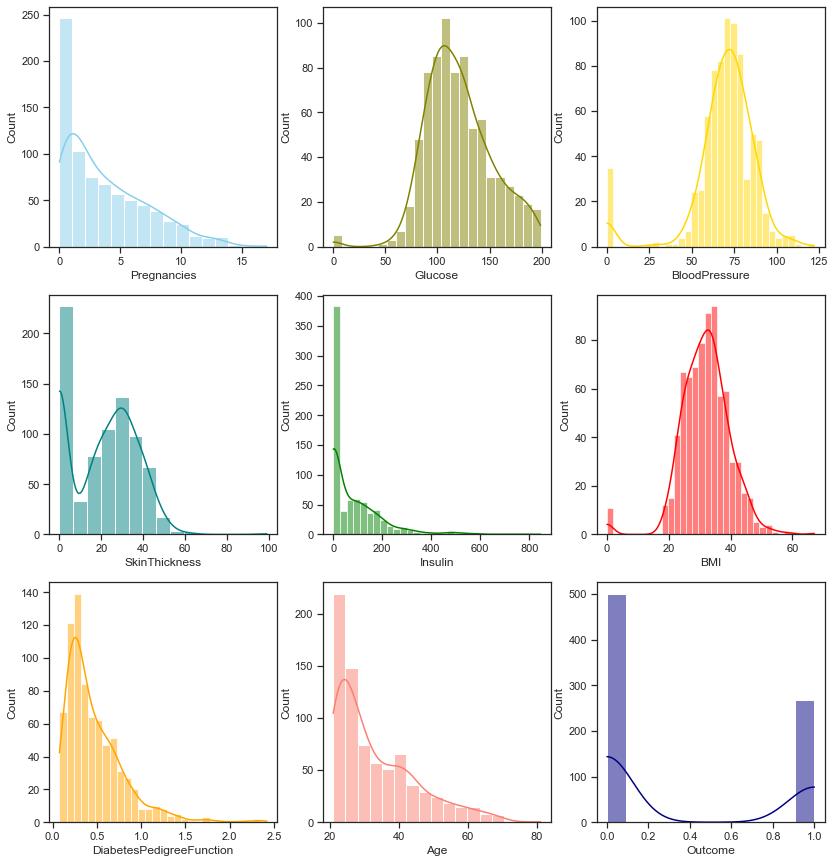

In [54]:
fig, axs = plt.subplots(3, 3, figsize=(13.9, 15))

sns.histplot(data=data, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="Glucose", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="BloodPressure", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=data, x="SkinThickness", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=data, x="Insulin", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=data, x="BMI", kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=data, x="DiabetesPedigreeFunction", kde=True, color="orange", ax=axs[2, 0])
sns.histplot(data=data, x="Age", kde=True, color="salmon", ax=axs[2, 1])
sns.histplot(data=data, x="Outcome", kde=True, color="navy", ax=axs[2, 2])

plt.show()

#### Scatter Plot

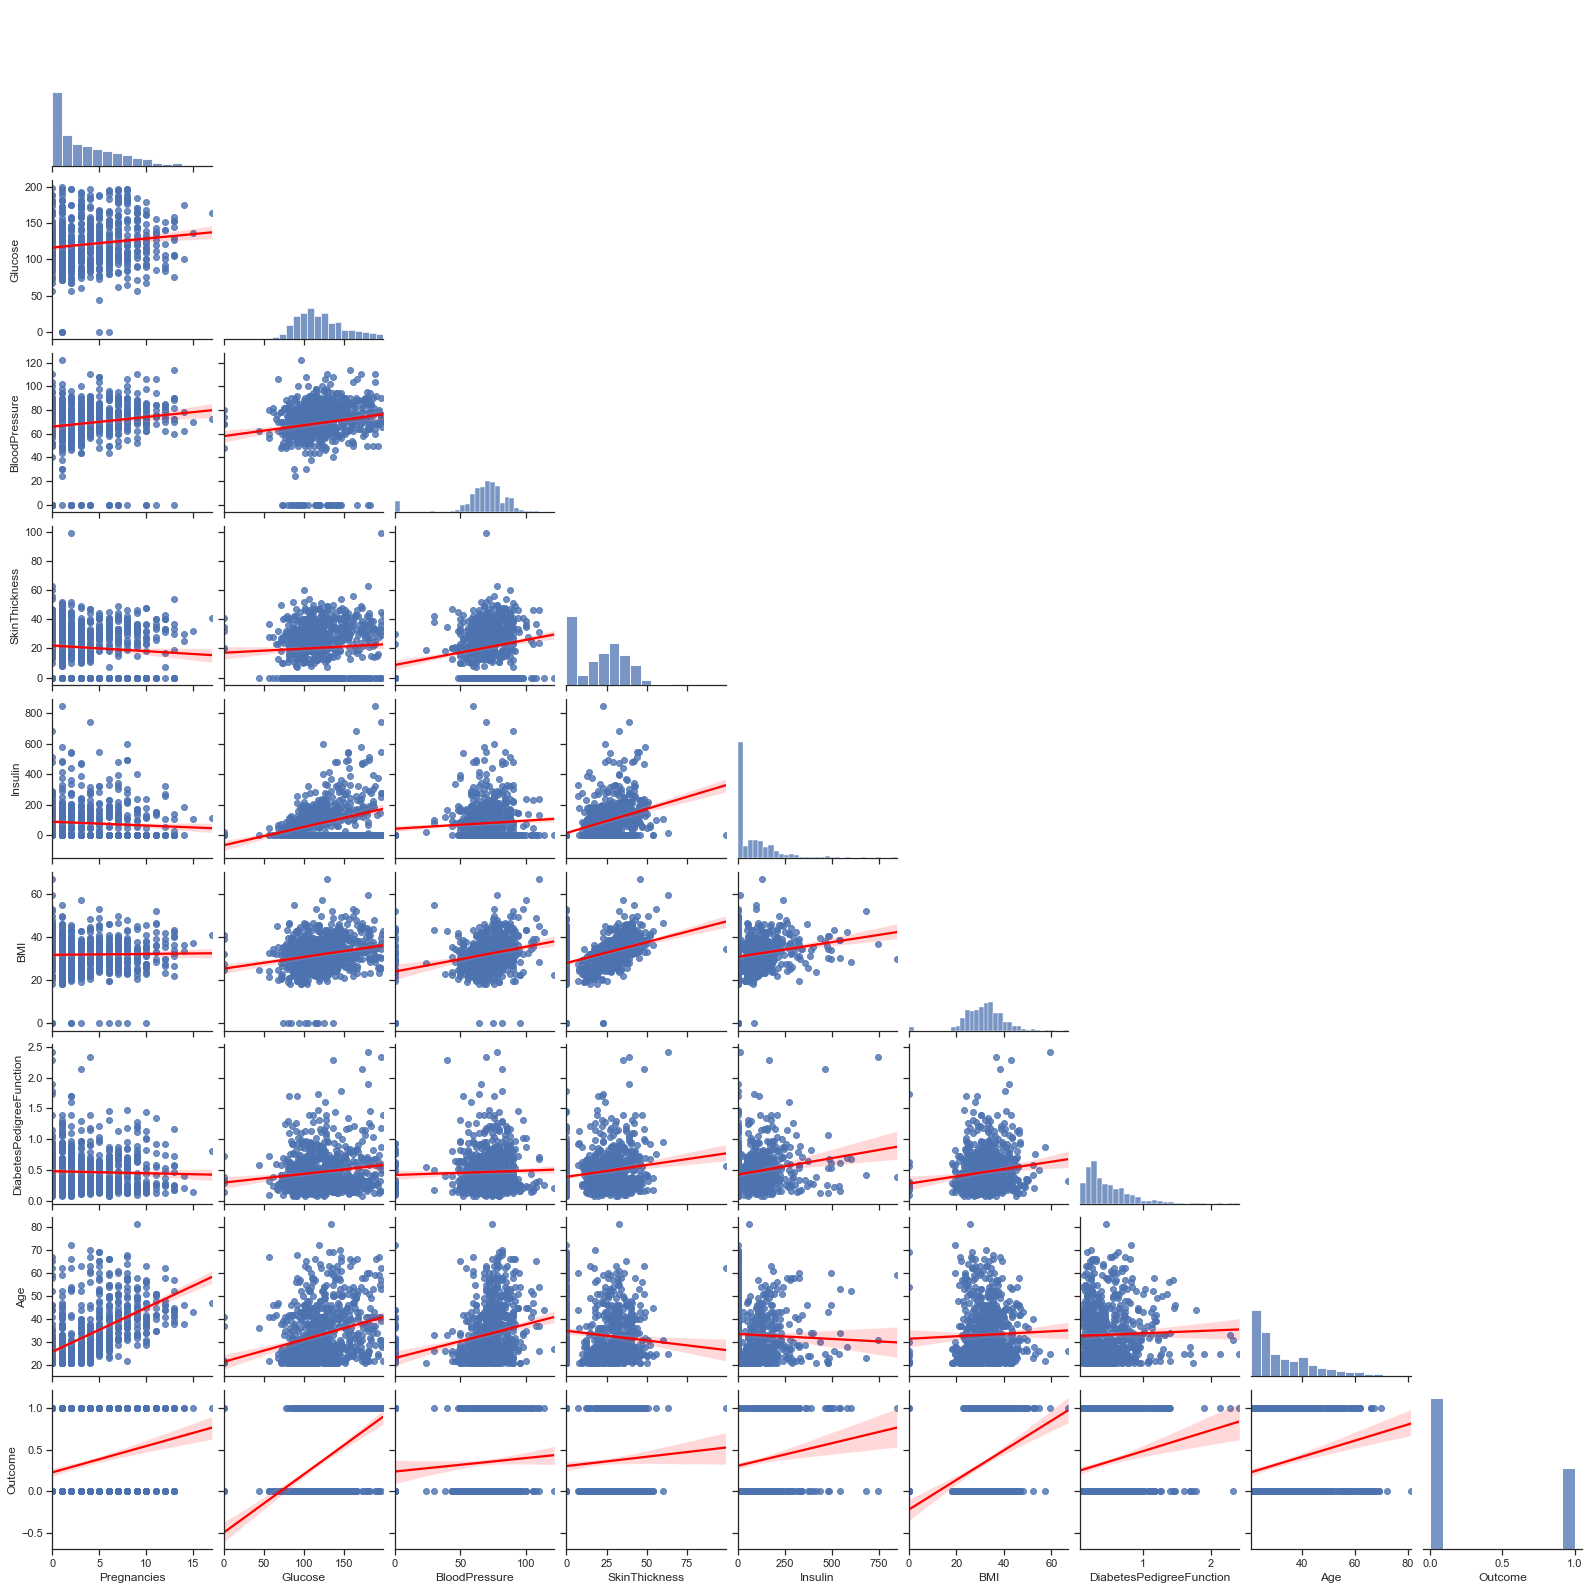

In [55]:
sns.set(style="ticks", color_codes=True)
plot = sns.pairplot(data, palette = "Outcome",kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### Scatter plot by Outcome

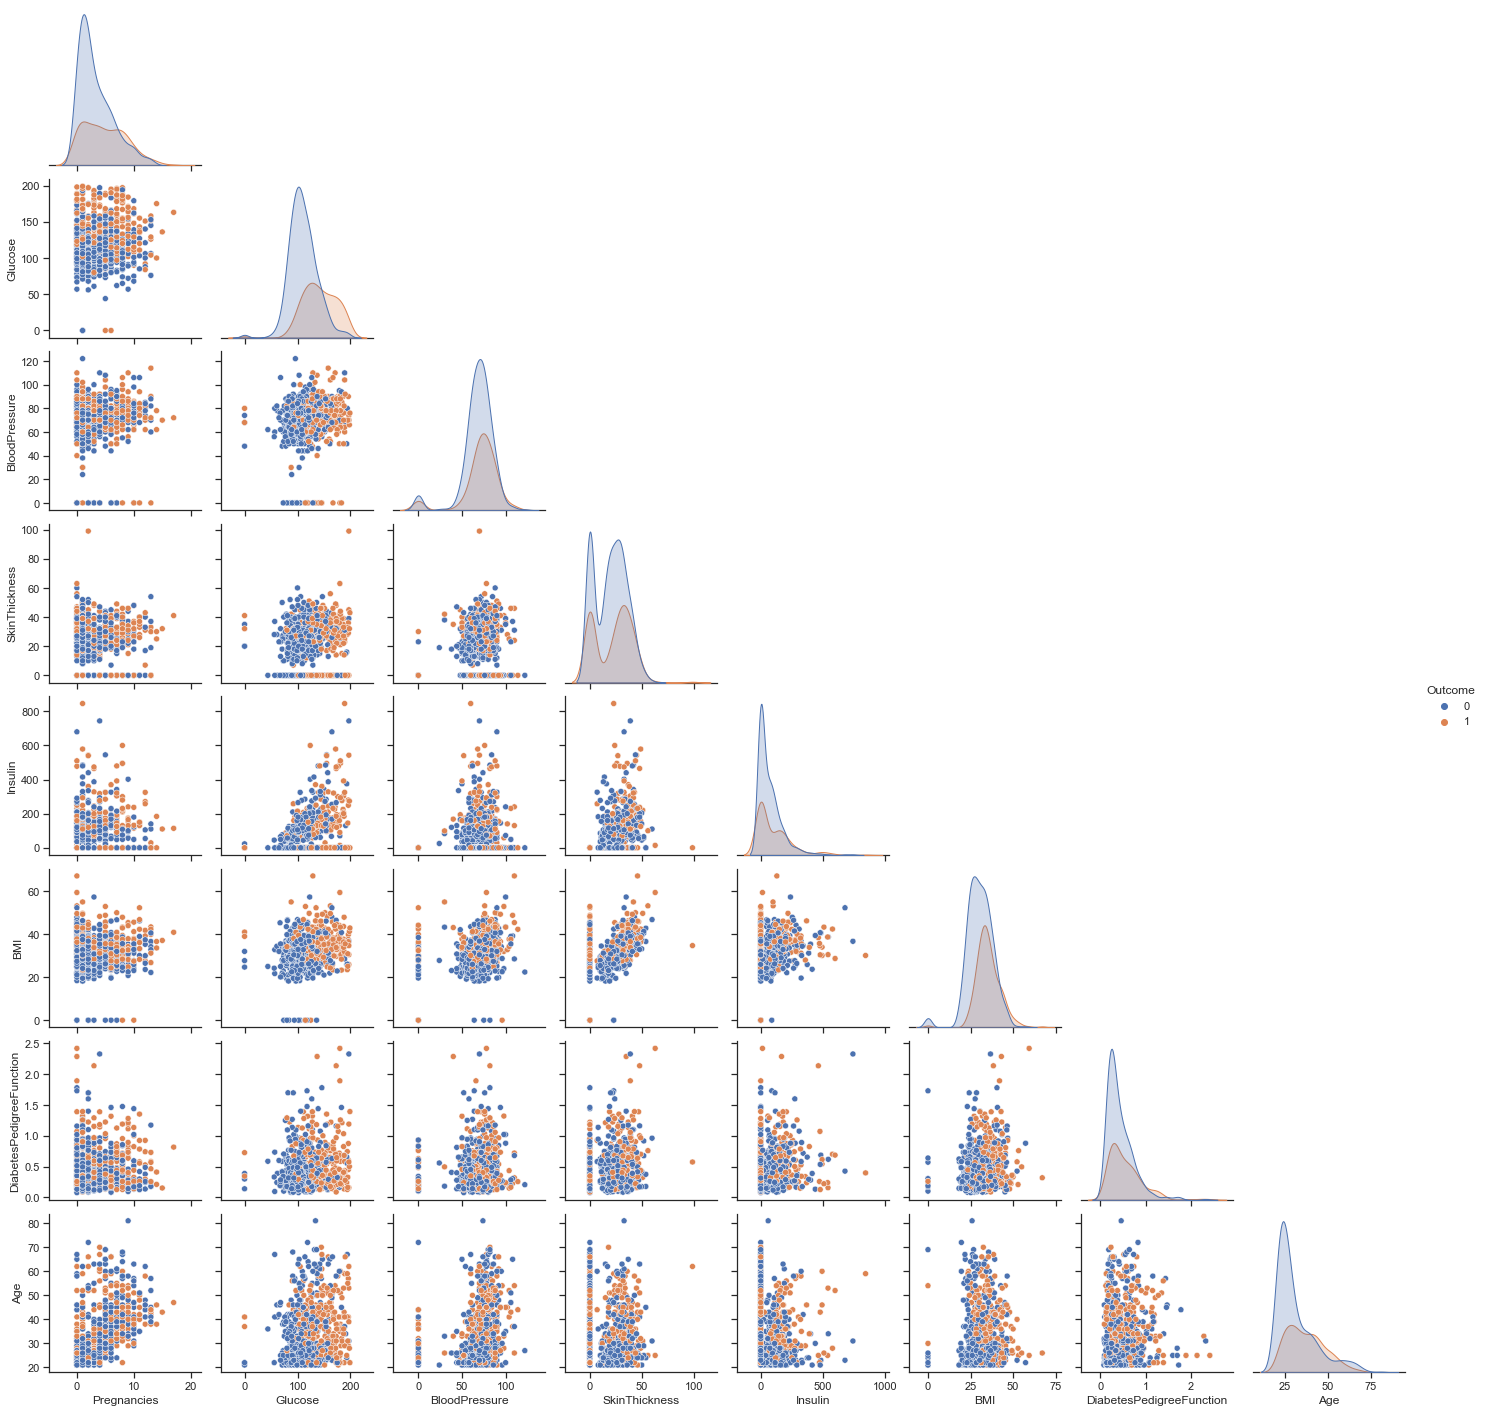

In [56]:
sns.set(style="ticks", color_codes=True)
plot = sns.pairplot(data, hue = "Outcome", corner=True)
plt.show()

### 3. Handling Outlier

#### Split into Independent and Dependent Variable 

In [57]:
X = data.loc[:,data.columns != "Outcome"]
y = data["Outcome"]

#### Outlier Using MinMax 

In [58]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
IQR = q3 - q1

print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
dtype: float64


#### Remove outliers 

In [59]:
# filter the dataset with the IQR
IQR_outliers = X[((X < (q1 - 1.5 * IQR)) |(X > (q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54
12,10,139,80,0,0,27.1,1.441,57
...,...,...,...,...,...,...,...,...
706,10,115,0,0,0,0.0,0.261,30
707,2,127,46,21,335,34.4,0.176,22
710,3,158,64,13,387,31.2,0.295,24
715,7,187,50,33,392,33.9,0.826,34


In [60]:
data_cleaned = data.drop(IQR_outliers.index, inplace=False)
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

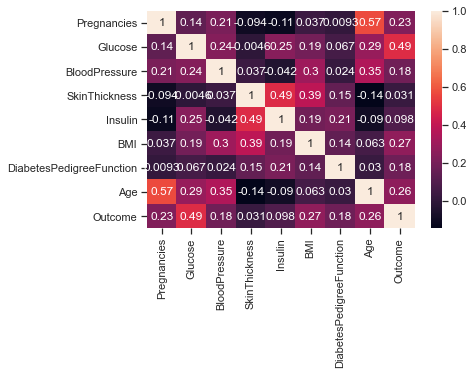

In [61]:
sns.heatmap(data=data_cleaned.corr(), annot = True)
# plt.tight_layout()

In [62]:
data_cleaned['Outcome'].value_counts()

0    439
1    200
Name: Outcome, dtype: int64

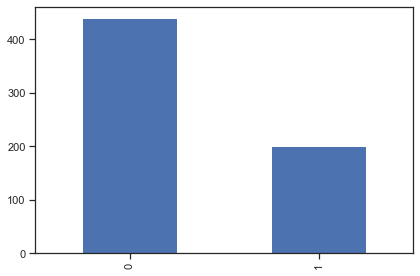

In [63]:
data_cleaned['Outcome'].value_counts().plot.bar()
plt.tight_layout()

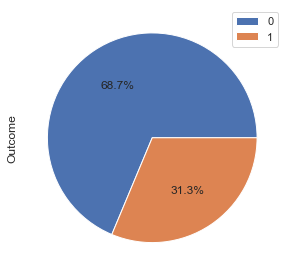

In [64]:
data_cleaned['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

# Data Transformation

In [65]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_cleaned)
data_normalized = pd.DataFrame(np_scaled)

data_normalized

,0,1,2,3,4,5,6,7,8
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444,1.0
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000,0.0
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000,0.0
...,...,...,...,...,...,...,...,...,...
634,0.769231,0.370130,0.558824,0.800000,0.566038,0.462264,0.083558,0.933333,0.0
635,0.153846,0.506494,0.470588,0.450000,0.000000,0.584906,0.235400,0.133333,0.0
636,0.384615,0.500000,0.500000,0.383333,0.352201,0.251572,0.150045,0.200000,0.0
637,0.076923,0.532468,0.323529,0.000000,0.000000,0.374214,0.243486,0.577778,1.0


# Modelling data
#### 1. Split data into Independent and Dependent Variable  

In [66]:
X = data_normalized.iloc[:,:-1]
y = data_normalized.iloc[:,-1]

#### 2. Split data into training and testing data  

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("The training data of X \n", X_train)
print("The testing data of X \n", X_test)
print("The training data of y \n", y_train)
print("The testing model of y \n", y_test)

The training data of X 
             0         1         2         3         4         5         6  \
569  0.076923  0.649351  0.647059  0.766667  0.566038  0.877358  0.230907   
395  0.307692  0.571429  0.705882  0.516667  0.000000  0.308176  0.306379   
250  0.000000  0.603896  0.441176  0.233333  0.465409  0.207547  0.058401   
525  0.384615  0.389610  0.529412  0.000000  0.000000  0.333333  0.067385   
28   0.846154  0.610390  0.558824  0.000000  0.000000  0.471698  0.307278   
..        ...       ...       ...       ...       ...       ...       ...   
71   0.307692  0.512987  0.617647  0.250000  0.553459  0.433962  0.327942   
106  0.230769  0.818182  0.382353  0.616667  0.707547  0.512579  0.249775   
270  0.153846  0.376623  0.705882  0.600000  0.377358  0.858491  0.044025   
435  0.230769  0.467532  0.529412  0.250000  0.330189  0.254717  0.026056   
102  0.076923  0.474026  0.735294  0.400000  0.455975  0.512579  0.292004   

            7  
569  0.555556  
395  0.933333  
25

#### 2. Train the data

1. Decision Tree

In [187]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

# y_pred_dt = model_dt.predict(X_test)

# print(np.count_nonzero(y_test==0))
# print(np.count_nonzero(y_test==1))
# print(np.count_nonzero(y_pred_dt==0))
# print(np.count_nonzero(y_pred_dt==1))

DecisionTreeClassifier()

View the model of Decision Tree

In [114]:
text_representation = tree.export_text(model_dt)
# tree.plot_tree(model)
print(text_representation)

|--- feature_1 <= 0.64
|   |--- feature_1 <= 0.37
|   |   |--- feature_5 <= 0.52
|   |   |   |--- feature_2 <= 0.19
|   |   |   |   |--- feature_4 <= 0.26
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  0.26
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_2 >  0.19
|   |   |   |   |--- class: 0.0
|   |   |--- feature_5 >  0.52
|   |   |   |--- feature_5 <= 0.53
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  0.53
|   |   |   |   |--- feature_3 <= 0.54
|   |   |   |   |   |--- feature_6 <= 0.52
|   |   |   |   |   |   |--- feature_2 <= 0.54
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_2 >  0.54
|   |   |   |   |   |   |   |--- feature_3 <= 0.40
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_3 >  0.40
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_6 >  0.52
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_3 > 

2. Logistic Regression

In [188]:
model_lr = LogisticRegression(solver='lbfgs')

model_lr.fit(X_train,y_train)
# y_pred_LR = model_lr.predict(X_test)

# print(np.count_nonzero(y_test==0))
# print(np.count_nonzero(y_test==1))
# print(np.count_nonzero(y_pred_LR==0))
# print(np.count_nonzero(y_pred_LR==1))

LogisticRegression()

3. K Nearest Neighbours

In [189]:
model_knn = KNeighborsClassifier(n_neighbors=2) # konfigurasi algoritma

model_knn.fit(X_train, y_train) # training model/classifier
# y_pred_knn = model_knn.predict(X_test) # melakukan prediksi

# print(np.count_nonzero(y_test==0))
# print(np.count_nonzero(y_test==1))
# print(np.count_nonzero(y_pred_knn==0))
# print(np.count_nonzero(y_pred_knn==1))

KNeighborsClassifier(n_neighbors=2)

4. Random Forest

In [190]:
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(X_train,y_train)
# y_pred_rf = model_rf.predict(X_test)

# print(np.count_nonzero(y_test==0))
# print(np.count_nonzero(y_test==1))
# print(np.count_nonzero(y_pred_rf==0))
# print(np.count_nonzero(y_pred_rf==1))

RandomForestClassifier()

5. Support Vector Machine 

In [191]:
model_svc = SVC(gamma='scale')

model_svc.fit(X_train,y_train)
# y_pred_svc = model_svc.predict(X_test)

# print(np.count_nonzero(y_test==0))
# print(np.count_nonzero(y_test==1))
# print(np.count_nonzero(y_pred_svc==0))
# print(np.count_nonzero(y_pred_svc==1))

SVC()

6. Naive Bayes

In [192]:
model_nb = GaussianNB()

model_nb.fit(X_train,y_train)
# y_pred_nb = model_nb.predict(X_test)

# print(np.count_nonzero(y_test==0))
# print(np.count_nonzero(y_test==1))
# print(np.count_nonzero(y_pred_nb==0))
# print(np.count_nonzero(y_pred_nb==1))

GaussianNB()

# Evaluation

Evaluation the model using Accuracy

In [193]:
models = [model_dt, model_lr, model_knn, model_rf, model_svc, model_nb]
accuracy_scores = []
mae = []
mse = []
rmse = []

for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)


[0.6822916666666666, 0.7916666666666666, 0.75, 0.7760416666666666, 0.7864583333333334, 0.7916666666666666]


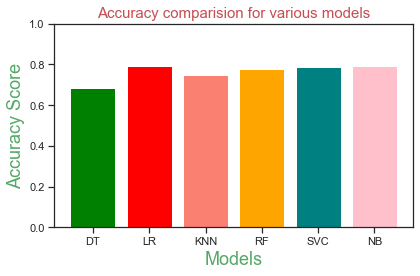

In [194]:
plt.bar(['DT', 'LR', 'KNN', 'RF', 'SVC', "NB"], accuracy_scores, color=["green", "red", "salmon","orange","teal","pink"])
plt.ylim(0.0,1)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()

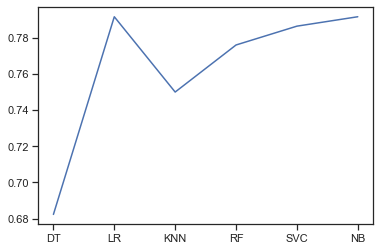

In [195]:
plt.plot(['DT', 'LR', 'KNN', 'RF', 'SVC', "NB"],accuracy_scores)

Evaluation the model using Confusion matrix

In [197]:
cm = confusion_matrix(y_test,model_rf.predict(X_test))
print(cm)

[[120  12]
 [ 31  29]]


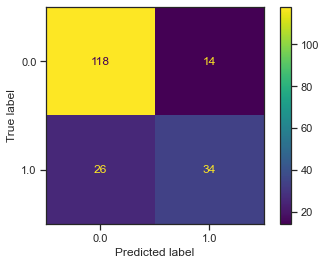

In [204]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,model_nb.predict(X_test)), 
                       display_labels = model_nb.classes_).plot()

Classification report

In [203]:
cr = classification_report(y_test,model_nb.predict(X_test))
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       132
         1.0       0.71      0.57      0.63        60

    accuracy                           0.79       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192

